<p><img alt="Colaboratory logo" height="140px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" align="left" hspace="10px" ></p>

<h1><b>Tarea 1: Física experimental <b></h1>

----
<div align="right">
<font size=3>
José David Bernal Restrepo <br>
1018342557
</font>
</div>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import poisson
from scipy.stats import norm
from scipy.special import factorial
from scipy import integrate 

In [127]:
# -- Lectura de datos --
diametros = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQSidQdK3JoPyvo5oMZikN26SZu_ocydulnYxO_p0nAdaFYPIY6X4adF0iVQH-HziuOJRyVaH7gRObC/pub?output=csv"
conteo = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ3bJHnZMP9gq_j1EB8XgDV5qu5ymJvzLexHH7QoKxyrKhSmTxBBAYzyuCtJCt_FZYbkBD8ANAPW4Fz/pub?output=csv"
diametros = pd.read_csv(diametros)
conteo = pd.read_csv(conteo)

conteo.Conteo_g3 = conteo.Conteo_g3.astype('Int64')

conteo_mil = pd.DataFrame({'g1':[295], 'g2':[282], 'g3':[312]}).T.rename(columns={0:'Value'})

<h3> Funciones de densidad de probabilidad </h3>

| Gauss | Poisson |
| --------- | -------------------- |
| $G(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}  \cdot e ^ {- \frac{(x-\mu)^2}{2\sigma^2}}  $|  $P(x, \mu) = \frac{\mu^x e^{-\mu}}{x!}$  |
| $G(x_1 \leq x \leq x_2) = \displaystyle\int_{x_1}^{x_2}  \frac{1}{\sigma \sqrt{2\pi}}  \cdot e ^ {- \frac{(x-\mu)^2}{2\sigma^2} } dx$  | $P(x_1 \leq x \leq x_2 ) = \displaystyle\sum_{i=x_1}^{x_2} \frac{\mu^x_i e^{-\mu}}{x_i!}$  |

In [128]:
def normal_distribucion(x,  sigma,  mu):
    """This function describes how the data are distributed in a population that follows a normal distribution. The Gaussian probability density function.
    
    -- Parameters: --

    x : The random variable whose distribution we want to describe.

    simga:  standard deviation, a measure of the dispersion of the data around the mean.

    mu:  mean of the distribution, which indicates the central value of the bell

    return: probability of x

    """

    normal = ( 1 / ( np.sqrt( 2 * np.pi * sigma**2) ) ) * np.exp( -( (0.5)*( x - mu)**2 ) /  ( sigma ** 2))

    return normal


def poisson_distribucion(x, mu):
    """Discrete probability distribution function for modeling the number of rare events that occur in a time interval
     
    -- Parameters: --

    x : The random variable whose distribution we want to describe.
    
    mu:  mean of the distribution

    """
    poisson = ( ( (mu ** x )* np.exp(-mu) ) / ( factorial(x) ) )

    return poisson 



#  Distribución Gaussiana 


1. Graficar el conjunto de medidas de diámetros de canicas que su grupo tomó (un histograma) y analizar la
distribución de los datos. ¿Tiene la forma de una distribución Gaussiana? ¿Son suficientes datos para dar alguna
conclusión? Reporte las variables de tendencia central ($\bar x, s$).

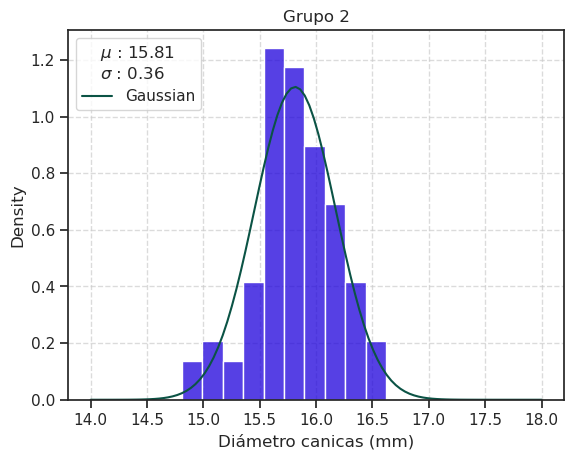

In [129]:
def distribucion(df=diametros, columna='diametros_g1', normal=False, color='#1d00dc', title='', gcolor="#0B5345"):
    """función para graficar un histograma de los datos de las canicas"""
    
    sns.set(style="ticks")
    sns.histplot(data=df, x=f'{columna}', stat='density', color=color)
    plt.title(title)
    plt.xlabel('Diámetro canicas (mm)')
    #plt.ylabel('Probabilidad')

    # Medidas de tendencia central
    media = df[columna].mean()
    std = df[columna].std()

    plt.grid(True, linestyle='--', alpha=0.7)

    if normal == True:
        # -- Graficar campana de Gauss --
        rango = np.linspace(14, 18, 100)
        normal_ = normal_distribucion(rango, std, media)
        sns.lineplot(x=rango, y=normal_, label='Gaussian', color=gcolor)

    # -- Mostrar media y desviacion estandar --
    legend_text = f'$\mu$ : {media :.2f} \n$\sigma $ : {std :.2f}'
    plt.legend(loc='upper left', title=legend_text)

# Grupo 2
distribucion(columna='Diametro_g2', normal=True, title='Grupo 2')
plt.show()



- **Respuesta**:  Los datos siguen una distribución que se asemeja a la forma de campana característica de una distribución normal, donde la dispersión alrededor de la media se describe mediante medidas de dispersión gaussiana, aún no hay suficientes datos para identificar completamente una distriución normal

2. Repita el proceso del ítem anterior, pero usando la totalidad de los datos disponibles en la tabla de Excel.

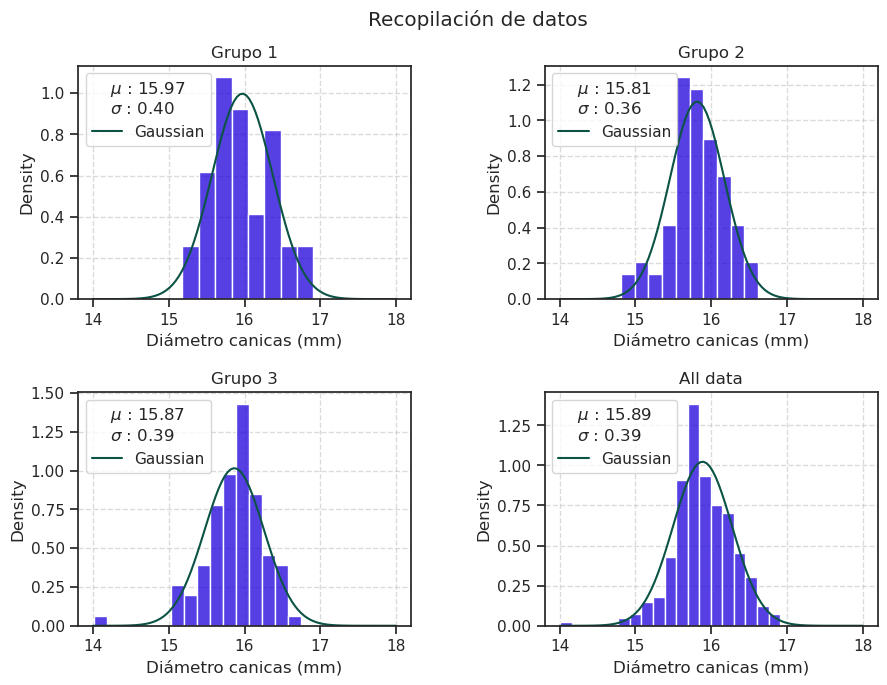

In [130]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
distribucion(columna='Diametro_g1', title='Grupo 1', normal=True)

plt.subplot(2,2,2)
distribucion(columna='Diametro_g2', title='Grupo 2', normal=True)

plt.subplot(2,2,3)
distribucion(columna='Diametro_g3', title='Grupo 3', normal=True)

plt.subplot(2,2,4)

# -- Ajustes de todos los datos --
all_data = diametros.melt()
distribucion(df=all_data, columna='value', title='All data', normal=True)

plt.suptitle('Recopilación de datos')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()

- **Respuesta:** Los datos tomados por cada grupo se asemejan a la curva formada por la campana de Gauss, aunque especialmente en el grupo 3 notamos una gran acumulacion de datos para un intervalo, que difiere notablemente con la distribución de datos

3. Aplique el teorema de límite central analizando la distribución de los valores medios de subconjuntos de datos de
diferentes tamaños (cada vez más grandes). Discuta el comportamiento de las medidas de tendencia central ($\mu, \sigma$)

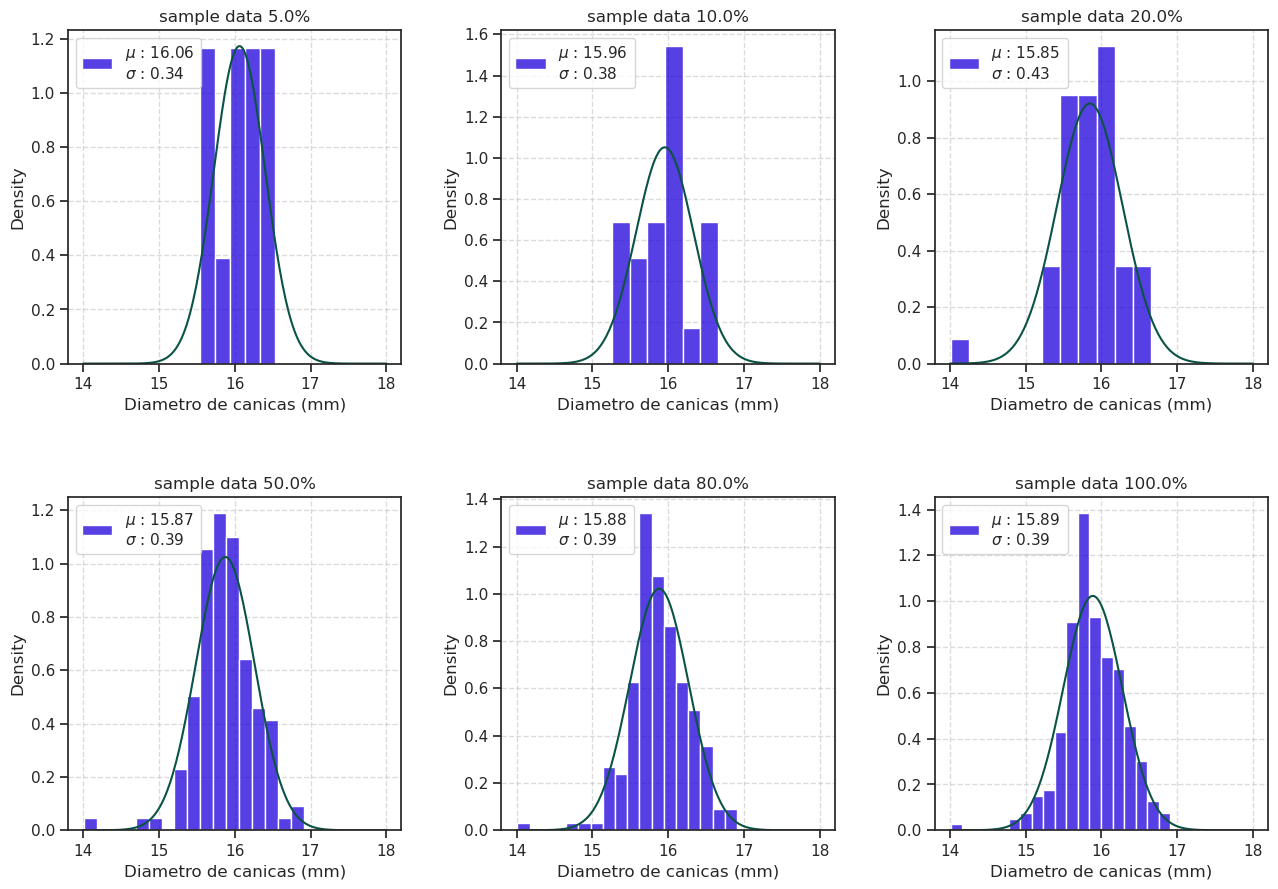

In [131]:
intervalos = [0.05, 0.1, 0.2, 0.5, 0.8, 1 ] # Intervalos de datos correspondientes a 5%, 10%, 20%, 50%, 80% y 100% de los datos

all_data.drop(columns=['variable'])
total_data = all_data.shape[0]

plt.figure(figsize=(15,10))

for i in range(len(intervalos)):

    sub = 231 + i
    plt.subplot(sub) # graph every subplot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Diametro de canicas (mm)')

    plt.title(f'sample data {intervalos[i]*100 :.1f}%')
    cantidad = int(total_data*intervalos[i]) # Cantidad de datos por intervalo de df

    df_chikito = all_data.sample(frac=intervalos[i], random_state=1) #Df con n cantidad de datos

    sns.histplot(data=df_chikito, x='value', stat='density', color='#1d00dc')

    # Medidas de dispersión
    mean = df_chikito['value'].mean()
    std = df_chikito['value'].std()

    #Crear distribución normal, usando la media y la devS de los datos 
    rango = np.linspace(14, 18, 200)
    normal_values = norm.pdf(rango, mean, std)

    #Add info of Dispersion measurements
    legend_text = f'$\mu$ : {mean :.2f} \n$\sigma $ : {std :.2f}'
    plt.legend([legend_text], loc='upper left')

    sns.lineplot(x=rango, y=normal_values, color="#0B5345")

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.4)

- **Respuesta:**  A medida que tomamos mayor cantidad de datos se va ajustando más a una campana de Gauss

<h4> Comportamiento de media y desviacion estandar </h4>

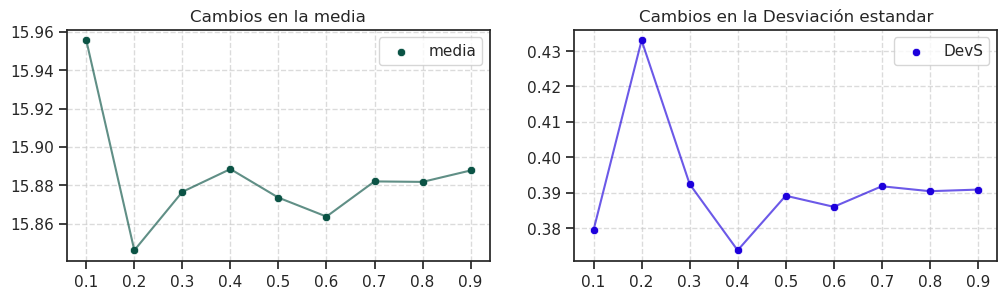

In [132]:
samples =  np.arange(10, 100, 10)/100
total_data = all_data.shape[0]

sigmas, mus = [], []

for sample in samples:

    df_chikito = all_data.sample(frac=sample, random_state=1) #Df con n cantidad de datos

    # Medidas de dispersión para n datos
    mus.append(df_chikito['value'].mean())
    sigmas.append(df_chikito['value'].std())

plt.figure(figsize=(12,3))


plt.subplot(121)
plt.title('Cambios en la media')
plt.grid(True, linestyle='--', alpha=0.7)
sns.lineplot(x=samples, y=mus, color ='#0B5345', alpha=0.65)
sns.scatterplot(x=samples, y=mus,  color ='#0B5345', label='media')

plt.subplot(122)
plt.title('Cambios en la Desviación estandar')
plt.grid(True, linestyle='--', alpha=0.7)
sns.lineplot(x=samples, y=sigmas,  color='#1d00dc', alpha=0.65)
sns.scatterplot(x=samples, y=sigmas,  color='#1d00dc', label='DevS')

plt.show()

- **Respuesta:**  Notamos que mientras nuestra muestra tiene pocos valores la media y la distribución oscilan bruscamente, mientras incrementamos el tamaño de la muestra el valor de la media y de la desviación estandar comienzan a tomar un valor similar ($\mu \approx 15.90, \sigma \approx 0.39$)

<h3>Aplicacion del T.L.C </h3>

Según el teorema del limite central la media de los datos totales es igual al promedio de las medias de las muestras y la desviación estándar es $$\sigma = \frac{S}{\sqrt{N}}$$ Donde $S$ es la desviación estándar de las medias de las muestras y $N$ es el número total de datos totales

In [133]:
# Usando el teorema del límite central
media_tcm = np.mean(mus)
devS_tcm = np.std(mus / np.sqrt(total_data))

#Usando los valores de los datos
media, devS = np.mean(all_data['value']), np.std(all_data['value'])

print(f'Variables de tendencia\n(μ) media T.C.M : {media_tcm :.3f}, (σ) devS T.C.M : {devS_tcm :.3f}\n(μ) media total : {media :.3f}, (σ) devS total : {devS :.3f}')

Variables de tendencia
(μ) media T.C.M : 15.884, (σ) devS T.C.M : 0.002
(μ) media total : 15.886, (σ) devS total : 0.389


- **Respuesta:** La media obtenida por el T.C.M es muy similar a los media total de los datos, por el contrario la desviación estandar no se comporta de esa manera, puede ser debido a errores en las mediciones

4. Calcular la probabilidad de que el diámetro de una canica esté entre 14.52 mm y 16.35 mm.

In [134]:
# Límites
lim_inf =  14.52
lim_sup =  16.53 

# Medidas de tendencia central
mean = all_data['value'].mean()
std = all_data['value'].std()

# Integral definida de la función normal evaluada en los límites 
probabilidad, _ = integrate.quad(normal_distribucion, lim_inf, lim_sup, args=(std, mean) )

print(f'Probabilidad de que el diametro de la canica este entre {lim_inf} mm y {lim_sup} mm es de {probabilidad*100 :.2f}%')



Probabilidad de que el diametro de la canica este entre 14.52 mm y 16.53 mm es de 95.05%


5. ¿Cuál es la probabilidad de que al medir otra canica su diámetro sea mayor a 17.00 mm?

In [135]:
#Límites
lim_inf =  17.00
lim_sup =  np.inf 

# Medidas de tendencia central
mean = all_data['value'].mean()
std = all_data['value'].std()

# Integral definida de la función normal evaluada en los límites 
probabilidad, _ = integrate.quad(normal_distribucion, lim_inf, lim_sup, args=(std, mean) )

print(f'Probabilidad de que el diametro de la canica sea mayor a {lim_inf} mm es de {probabilidad*100 :.2f}%')

Probabilidad de que el diametro de la canica sea mayor a 17.0 mm es de 0.21%


6. ¿Cuál es la probabilidad de que al medir otra canica su diámetro sea menor a 14.23 mm?

In [136]:
# Límites
lim_inf = -np.inf
lim_sup =  14.23

# Medidas de tendencia central
mean = all_data['value'].mean()
std = all_data['value'].std()

# Integral definida de la función normal evaluada en los límites 
probabilidad, _ = integrate.quad(normal_distribucion, lim_inf, lim_sup, args=(std, mean) )

print(f'Probabilidad de que el diametro de la canica sea menor a  {lim_sup} mm es de {probabilidad*100 :.3f}%')

Probabilidad de que el diametro de la canica sea menor a  14.23 mm es de 0.001%


# Distribución de Poisson 


Los datos usados para el análisis corresponden a las medidas de partículas en el contador Geiger en intervalos de 10 s

7. Graficar la totalidad de los datos de conteo que se encuentran en la tabla de Excel correspondiente a los eventos
registrados en intervalos de 10 s. ¿Visualmente, el fenómeno se predice con una distribución de Poisson? Reporte
la media de su distribución ($\bar x$) y su desviación estándar ($\sigma$).

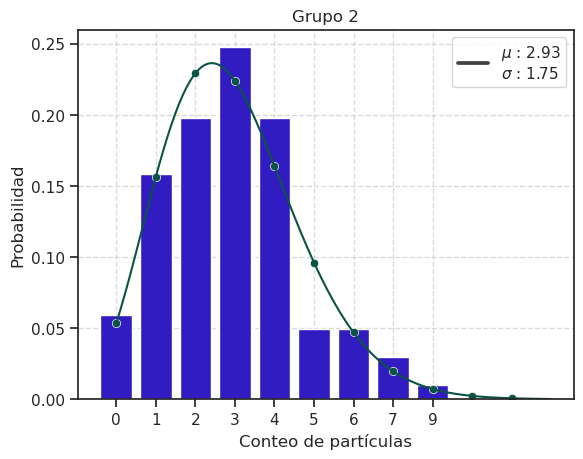

In [137]:
def conteo_particulas(df=conteo, columna='Conteo_g2', Poisson=True, color='#1d00dc', title='', gcolor="#0B5345" ):

    # -- Get value counts and graph--
    count = (pd.DataFrame(df[f'{columna}'].value_counts())
            .reset_index().rename(columns={'index':'value', f'{columna}':'count'})
            .sort_values(by='value')
            .reset_index(drop=True))

    count['count'] = count['count'] / df.shape[0] # Change count to propability

    sns.barplot(data=count, x='value', y='count', color=color)

    plt.title(title)
    plt.xlabel('Conteo de partículas')
    plt.ylabel('Probabilidad')

    # Medidas de tendencia central
    media = df[columna].mean()
    std = df[columna].std()

    if Poisson == True:

        # Line
        rango = np.linspace(0,11,200)
        poisson_values = poisson.pmf(rango, mu=media)
        sns.lineplot(x=rango, y=poisson_values, color=gcolor)

        # Points
        rango_int = np.arange(0,11)
        poisson_values =  poisson.pmf(rango_int, mu=media)
        sns.scatterplot(x=rango_int, y=poisson_values, color=gcolor)

        plt.grid(True, linestyle='--', alpha=0.7)

        # Legend
        legend_text = f'$\mu$ : {media :.2f}\n$\sigma$ : {std :.2f}'
        plt.legend([legend_text], loc='upper right')

conteo_particulas(columna='Conteo_g2',  title='Grupo 2')
plt.show()

- **Respuesta:** Visualmente el conteo de partículas por el detector Geiger se ajusta a una distibución de Poisson

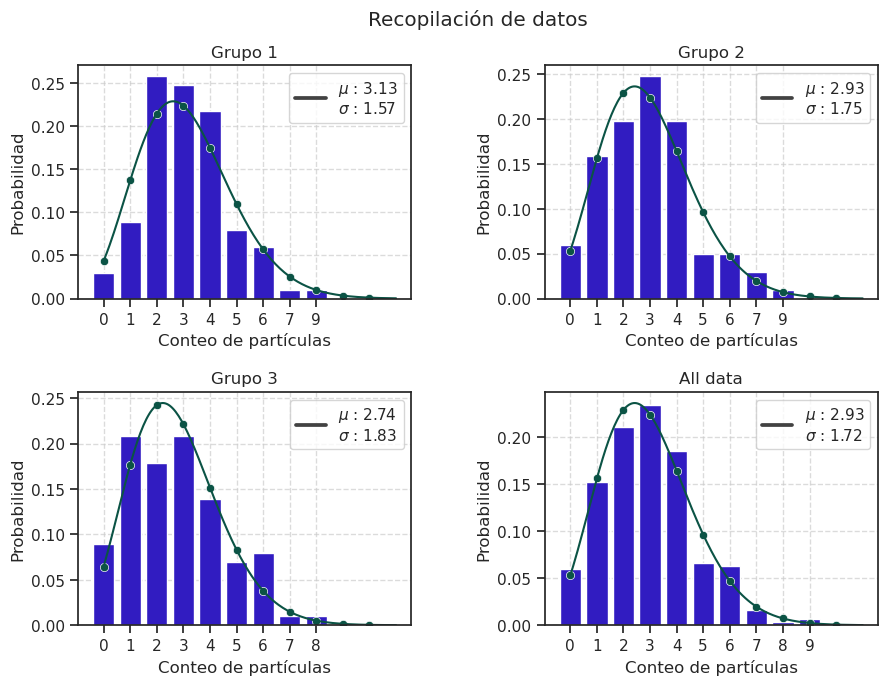

In [138]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
conteo_particulas(columna='Conteo_g1',  title='Grupo 1')

plt.subplot(2,2,2)
conteo_particulas(columna='Conteo_g2',  title='Grupo 2')

plt.subplot(2,2,3)
conteo_particulas(columna='Conteo_g3',  title='Grupo 3')

plt.subplot(2,2,4)
# -- Ajustes de todos los datos --
all_data = conteo.melt()
conteo_particulas(df=all_data, columna='value', title='All data')

plt.suptitle('Recopilación de datos')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

Es curioso notar cómo la distribución y las medidas de disperciónde cada grupo es diferente, debido a las diferentes condiciones en las que se dio la toma de datos. El total de los datos si muestra un comportamiento en forma de la distribución de Poisson

8. De acuerdo con el resultado anterior, y suponiendo que el fenómeno se puede modelar con una distribución de
Poisson ¿Cuál es la probabilidad de que en un intervalo de 10 s se produzcan 3 eventos de detección? ¿Cuál es la
probabilidad de que en el mismo intervalo no se detecte ninguna partícula?

In [139]:
mean = all_data['value'].mean() #media de todos los datos

eventos = 3
probabilidad = poisson_distribucion(eventos, mean)
print(f'La probabilidad de que en un intervalo de 10 s se produzcan {eventos} eventos de detección es de {probabilidad *100 :.2f}%')

eventos = 0
probabilidad = poisson_distribucion(eventos, mean)
print(f'La probabilidad de que en un intervalo de 10 s se produzcan {eventos} eventos de detección es de {probabilidad *100 :.2f}%')

La probabilidad de que en un intervalo de 10 s se produzcan 3 eventos de detección es de 22.39%
La probabilidad de que en un intervalo de 10 s se produzcan 0 eventos de detección es de 5.32%


9. Usando el número de cuentas que obtuvo para el intervalo de 1 000 s ¿Cuál sería el promedio esperado y la
incertidumbre para el número de detecciones en dicho intervalo? A partir de esté dato se puede deducir cual sería
el promedio de las detecciones de eventos (R) en un intervalo menor ¿Cuál sería para el caso de un intervalo de 10
s? ¿concuerda con lo que obtuvo en el numeral 7?

- **Respuesta** 

El promedio esperado, representado por lambda ($\lambda$) se calcula como $\lambda \pm \sqrt{\lambda}$, donde $\lambda$ es el número de partículas detectadas en el intervalo.

En nuestro caso, $\lambda = 295$, Por lo tanto, su incertidumbre se establece en $\sqrt{\lambda} = \sqrt{295} = 17.18$.

En resumen, el promedio esperado y la incertidumbre para el número de detecciones en un intervalo de 1000 segundos son de aproximadamente $(295 \pm 17)$ detecciones.

Para deducir que sucede en un intervalo de 10 s, podemos usar la siguiente expresión $R = \lambda \cdot \frac{\text{Nuevo  intervalo}}{\text{Intervalo medido}}$, que númericamente para nuestros datos $R = 295 \cdot \frac{10}{1000} = 2.95$ un valor muy cercano a la media de nuestras medidas ($\mu = 2.93$
)


10. Con los datos del numeral 9 para el intervalo de 1 000 s determine la probabilidad de que en 10 medidas de 10 s nunca se detecten 5 partículas.


In [145]:
medida_mil = 295
probabilidad_no_5 = (1 - poisson_distribucion(5, 2.95))*100

print(f'la probabilidad de que en un el intervalo de 10 s no se detecten 5 partículas es: {probabilidad_no_5 :.2f}%')

la probabilidad de que en un el intervalo de 10 s no se detecten 5 partículas es: 90.26%
